### Stuff...

In [53]:
# Proper 3D axes...
def set_axes_radius(ax, origin, radius):
    ax.set_xlim3d([origin[0] - radius, origin[0] + radius])
    ax.set_ylim3d([origin[1] - radius, origin[1] + radius])
    ax.set_zlim3d([origin[2] - radius, origin[2] + radius])

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])

    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    set_axes_radius(ax, origin, radius)

In [54]:
# Generates points on the surface of a sphere
import numpy as np
import math, random
from numpy import linalg as LA

def fibonacci_sphere(samples=1,randomize=True):
    rnd = 1.
    if randomize:
        rnd = random.random() * samples

    points = []
    offset = 2./samples
    increment = math.pi * (3. - math.sqrt(5.));

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2);
        r = math.sqrt(1 - pow(y,2))

        phi = ((i + rnd) % samples) * increment

        x = math.cos(phi) * r
        z = math.sin(phi) * r

        points.append([x,y,z])

    return points

In [26]:
cart=3
nf=200
sh=fibonacci_sphere(nf)
sph=np.array(sh)

### Points on the surface of a sphere...

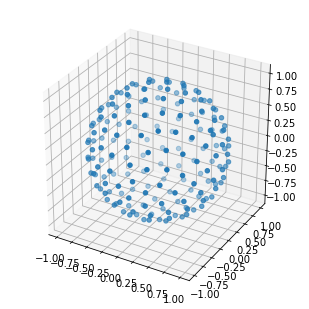

In [27]:
# Plot...
%matplotlib notebook 
%matplotlib inline 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_aspect('equal')

ax.scatter(sph[:,0], sph[:,1], sph[:,2])
set_axes_equal(ax)  
pyplot.show()

In [55]:
# Inertia tensor...
tin=np.zeros((cart,cart))
for i in range(0, nf):
    for j in range(0, nf):
        tin[0,0]=tin[0,0]+(sph[j,0]-sph[i,0])*(sph[j,0]-sph[i,0])
        tin[0,1]=tin[0,1]+(sph[j,0]-sph[i,0])*(sph[j,1]-sph[i,1])
        tin[0,2]=tin[0,2]+(sph[j,0]-sph[i,0])*(sph[j,2]-sph[i,2])
        tin[1,0]=tin[1,0]+(sph[j,1]-sph[i,1])*(sph[j,0]-sph[i,0])
        tin[1,1]=tin[1,1]+(sph[j,1]-sph[i,1])*(sph[j,1]-sph[i,1])
        tin[1,2]=tin[1,2]+(sph[j,1]-sph[i,1])*(sph[j,2]-sph[i,2])
        tin[2,0]=tin[2,0]+(sph[j,2]-sph[i,2])*(sph[j,0]-sph[i,0])
        tin[2,1]=tin[2,1]+(sph[j,2]-sph[i,2])*(sph[j,1]-sph[i,1])
        tin[2,2]=tin[2,2]+(sph[j,2]-sph[i,2])*(sph[j,2]-sph[i,2])
tin=tin/(2*nf**2)
eig=LA.eigvals(tin)

### Asphericity parameter A
$$
A = \frac{1}{6}\cdot\sum_{i=1}^{3}\left ( \frac{\delta_{i}}{\bar{\delta}}-1 \right )^2
$$

In [56]:
dbar=(eig[0]+eig[1]+eig[2])*(1/3)
ssum=0
for i in range(0, 3):
    ssum=ssum+((eig[i]/dbar)-1)**2
ssum=ssum*(1/6)
print(ssum)

1.600938275090047e-05


In [36]:
cell=np.zeros(3)
cell[0]=10.0
cell[1]=cell[0]
cell[2]=cell[1]

npx=5
npy=npx
npz=npy

stepx=cell[0]/npx
stepy=cell[1]/npy
stepz=cell[2]/npz

npx=npx+1
npy=npx
npz=npy

points=np.zeros((npx*npy*npz,cart))
idx=-1
for i in range(0, npx):
    for j in range(0, npy):
        for k in range(0, npz):
            idx=idx+1
            points[idx,0]=i*stepx
            points[idx,1]=j*stepy
            points[idx,2]=k*stepz
            #print(points[idx,:])
nl=idx

### Cubic mesh of points...

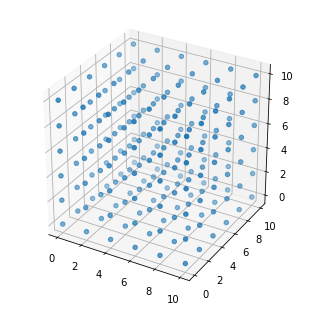

In [57]:
%matplotlib notebook 
%matplotlib inline 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_aspect('equal')

ax.scatter(points[:,0], points[:,1], points[:,2])
set_axes_equal(ax)  
pyplot.show()

In [58]:
tin=np.zeros((cart,cart))
for i in range(0, nl):
    for j in range(0, nl):
        tin[0,0]=tin[0,0]+(points[j,0]-points[i,0])*(points[j,0]-points[i,0])
        tin[0,1]=tin[0,1]+(points[j,0]-points[i,0])*(points[j,1]-points[i,1])
        tin[0,2]=tin[0,2]+(points[j,0]-points[i,0])*(points[j,2]-points[i,2])
        tin[1,0]=tin[1,0]+(points[j,1]-points[i,1])*(points[j,0]-points[i,0])
        tin[1,1]=tin[1,1]+(points[j,1]-points[i,1])*(points[j,1]-points[i,1])
        tin[1,2]=tin[1,2]+(points[j,1]-points[i,1])*(points[j,2]-points[i,2])
        tin[2,0]=tin[2,0]+(points[j,2]-points[i,2])*(points[j,0]-points[i,0])
        tin[2,1]=tin[2,1]+(points[j,2]-points[i,2])*(points[j,1]-points[i,1])
        tin[2,2]=tin[2,2]+(points[j,2]-points[i,2])*(points[j,2]-points[i,2])
tin=tin/(2*(nl**2))
eig=LA.eigvals(tin)

### Asphericity parameter A
$$
A = \frac{1}{6}\cdot\sum_{i=1}^{3}\left ( \frac{\delta_{i}}{\bar{\delta}}-1 \right )^2
$$

In [59]:
dbar=(eig[0]+eig[1]+eig[2])*(1/3)
ssum=0
for i in range(0, 3):
    ssum=ssum+(eig[i]/dbar-1)**2
ssum=ssum*(1/6)
print(ssum)

0.00010134678618080275
